In [47]:
import matplotlib.pylab as plt
import pandas as pd

# Load data
df = pd.read_csv('threshold_results.csv')

if len(df) != 120:
    print('WARNING: Not using complete dataset, check input CSV file.')

# Threshold values and column lists for each threshold for both T/B, truth-only, and bluff-only
threshold_values = list(range(100, 0, -10)) # [100, 90, 80, ..., 10]
combined_cols = list(map(lambda x: 'top_{}_percent'.format(x), threshold_values)) # ['top_100_percent', ...]
truth_only_cols = list(map(lambda c: c + 'T', combined_cols)) # ['top_100_percentT', ...]
bluff_only_cols = list(map(lambda c: c + 'B', combined_cols))# ['top_100_percentB', ...]
f1_score_cols = list(map(lambda x: 'top_{}_f1_score'.format(x), threshold_values))


In [48]:
# Plots the Classification Accuracy vs. Threshold 
# (Grouped by k = Number of hidden States in HMM, input folder, modified or normal HMM)
# PARAMS:
#    - model    = Model used ['hmm' or 'lstmHmm']
#    - cols     = Columns to use ['both', 'f1_score', 'truth-only', or 'bluff-only']
#    - infolder = Sequence input folder ['default' or 'pairwise']
#
def plot_accuracy_vs_threshold(model='hmm', cols='both',infolder='default'):
    
    y_name = cols.title()
    if cols != 'f1_score':
        y_name += ' Accuracy'
    else:
        y_name = 'F1 Score'
    if cols == 'both':
        y_name = 'Overall Accuracy'
    if model == 'lstmHmm':
        model_name = 'M-HMM'
    else: model_name = 'HMM'
    plot_title = '{} {} vs Threshold ({} Sequences)'.format(model_name,y_name,infolder.title())

    # Isolate rows with right infolder and model and k
    s2 = df.loc[df['infolder'].str.contains(infolder)]
    s2_hmm = s2.loc[s2['model'] == model]
    
    # Set up the plot
    fig, ax = plt.subplots()
    plt.title(plot_title)
    plt.xlabel('Threshold (% of Highest-Confidence Sequences Included)')
    plt.ylabel('Classification Accuracy (%)')
    plt.ylim([30,100])
    plt.xlim([100,0]) # Note: x-axis goes from 100 to 0 - All Included to Most Strict Threshold
    

    # Which columns to plot - combined, truth-only, or bluff-only
    if cols == 'both':
        cols_to_use = combined_cols
        plt.axhline(y=50, linestyle='dashed') # Dashed line at 50%
    elif cols == 'truth-only':
        cols_to_use = truth_only_cols
        plt.axhline(y=50, linestyle='dashed') # Dashed line at 50%
    elif cols == 'bluff-only':
        cols_to_use = bluff_only_cols
        plt.axhline(y=50, linestyle='dashed') # Dashed line at 50%
    elif cols == 'f1_score':
        cols_to_use = f1_score_cols
        plt.ylabel('F1 Score')
        plt.ylim([0.3,1.0])
        plt.axhline(y=0.5, linestyle='dashed') # Dashed line at 50%
    else:
        raise ValueError('Invalid selection for cols: {}'.format(cols))
    
    labels = ['50%']
    # One line for each k-value: y-value = average across seeds
    for k,group in s2_hmm.groupby('k'):
        ax.plot(threshold_values, group[cols_to_use].mean(), label='k = {}'.format(k))
        labels.append('k = ' + str(k))
    ax.legend(labels)

    plt.savefig('plots/threshold/' + plot_title.replace(' ', '_'), dpi=256)
    plt.show()
    


## Default Sequences

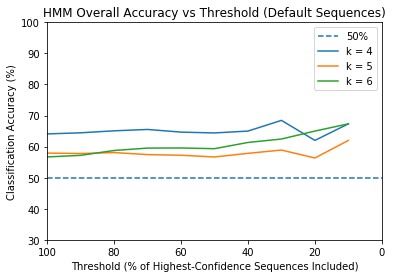

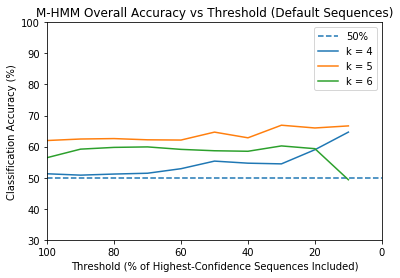

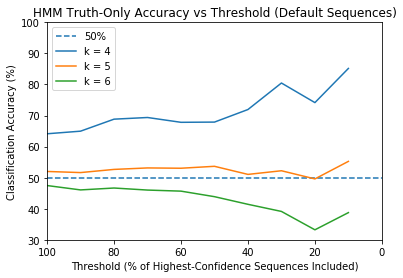

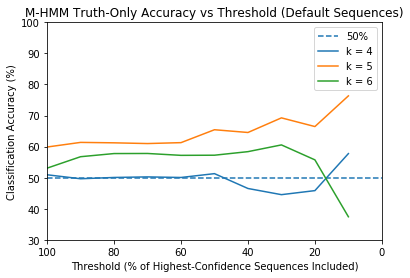

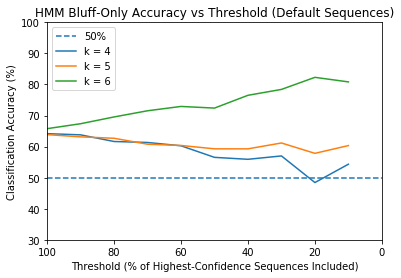

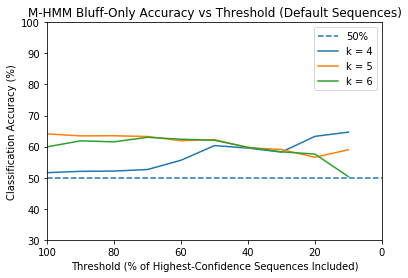

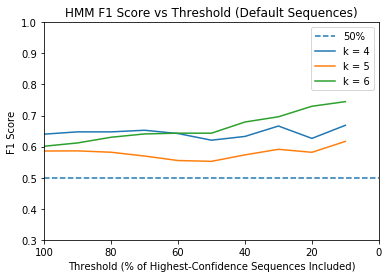

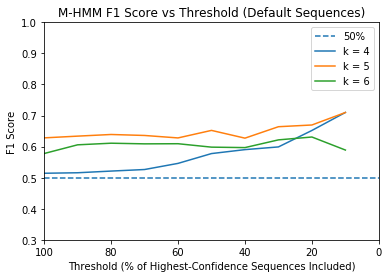

In [49]:
# Default sequences
for cols in ('both', 'truth-only', 'bluff-only', 'f1_score'):
    for model in ('hmm', 'lstmHmm'):
        plot_accuracy_vs_threshold(model, cols, 'default')

## Pairwise Sequences

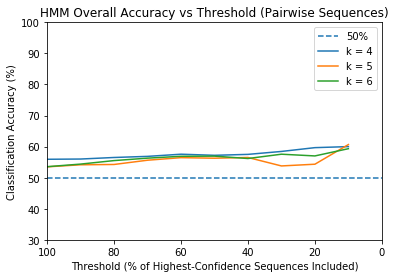

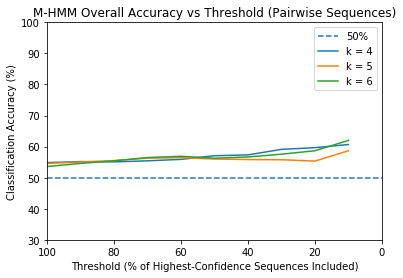

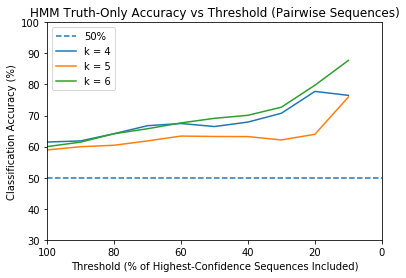

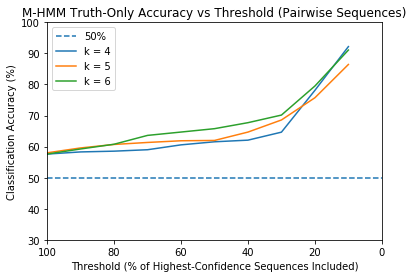

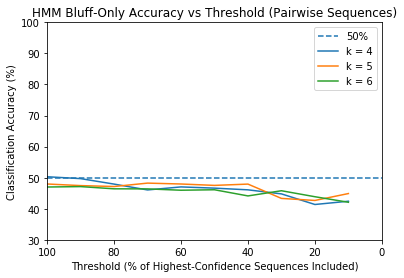

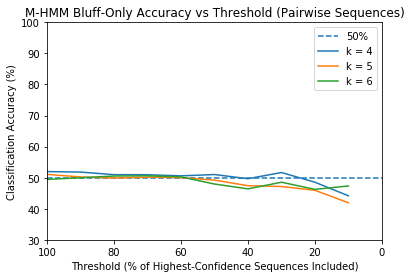

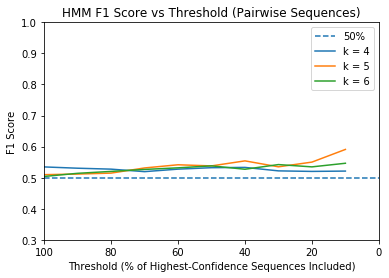

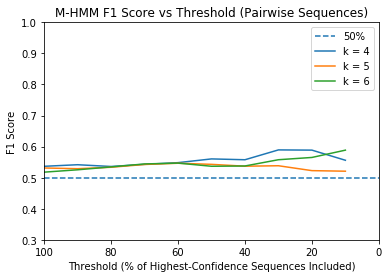

In [50]:
# Pairwise sequences
for cols in ('both', 'truth-only', 'bluff-only', 'f1_score'):
    for model in ('hmm', 'lstmHmm'):
        plot_accuracy_vs_threshold(model, cols, 'pairwise')